<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Женя! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

## Подготовка

Открываем файл, проверяем информацию:

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что время сразу в индексе!</font>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Выполняем ресемплирование по часу:

In [4]:
data = data.resample('1H').sum()

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Здесь предпологается ресемплирование по сумме. Порог метрики в 48 RMSE выставлен с учётом этого предположения.</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Ресемплирование по часу выполнено верно. Супер, что значения просуммированы, это проще интерпретируется, чем использование других агрегационных функций.</font>

In [5]:
data.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


<AxesSubplot:xlabel='datetime'>

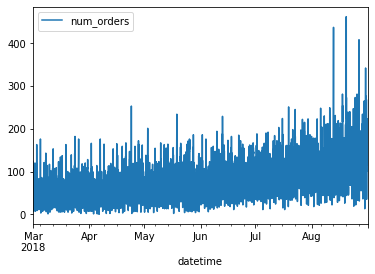

In [6]:
data.plot()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Есть график временного ряда! </font>

In [7]:
data.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


Для обучения моделей нужно будет создать дополнительные признаки: календарные (день недели, час, день и месяц, так как данные за один год), отстающие значения и скользящее среднее

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

## Анализ

Создаем календарные признаки:

In [8]:
data['hour'] = data.index.hour
data['month'] = data.index.month
data['day'] = data.index.day
data['day_of_week'] = data.index.dayofweek

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s>На мой взгляд: не все признаки подходят, чисто логически. Выскажу свою позицию:<br>

<font color='red'>1) Признак месяц: НЕТ, не подходит, у нас в истории всего один март, май... И данных меньше чем за год. Да и горизонт прогноза - часы. Поэтому сезонность времени года будет просто в тренде уже заложена.</font><br>
<font color='darkorange'>2) Признак день: НЕТ, также не подходит, у нас нет сезонности внутри месяца, будет просто последовательность чисел.</s><br></font>
<font color='green'>3) Признак день недели: ДА, т.к. у нас есть недельная сезонность.<br>
4) Признак час: ДА, т.к. есть часовая (суточная) сезонность.<br>

<font color='red'>Как ты думаешь?</font>

<font color='purple'><b>Согласен, исправил</b></font>

Посмотрим на общий тренд по месяцам:

<AxesSubplot:xlabel='month'>

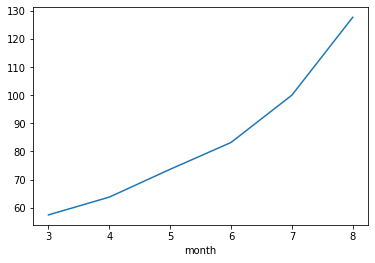

In [9]:
data.groupby('month')['num_orders'].mean().plot()

Число заказов растет

Посмотрим как меняется число заказов в течение месяца:

In [10]:
months = pd.DataFrame(
    np.polyval(
        np.polyfit(data.query('month == 3').groupby('day')['num_orders'].mean().index,
                   data.query('month == 3').groupby('day')['num_orders'].mean().values, 1
                  ),
        data.query('month == 3').groupby('day')['num_orders'].mean().index),
    columns = [3]
    )

In [11]:
for i in range(4, 9):
    months = months.join(
        pd.DataFrame(
            np.polyval(
                np.polyfit(data.query('month == @i').groupby('day')['num_orders'].mean().index,
                           data.query('month == @i').groupby('day')['num_orders'].mean().values, 1
                          ),
                data.query('month == @i').groupby('day')['num_orders'].mean().index),
            columns = [i]
        )
    )

<AxesSubplot:>

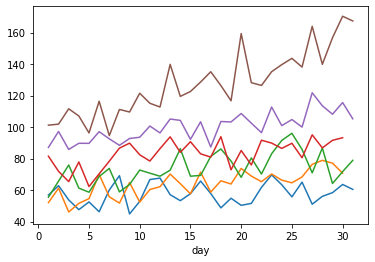

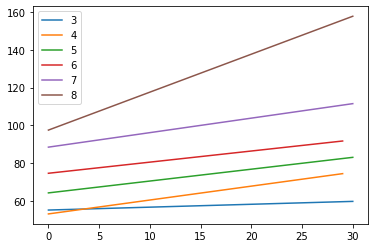

In [12]:
for i in range(3, 9):
    data.query('month == @i').groupby('day')['num_orders'].mean().plot()

months.plot()

Число заказов в течение месяца также увеличивается

Зависимость числа заказов от дня недели:

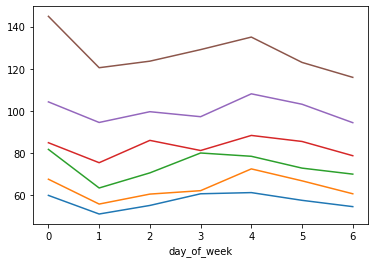

In [13]:
for i in range(3, 9):
    data.query('month == @i').groupby('day_of_week')['num_orders'].mean().plot()

Создаем признак "Скользящее среднее" для нахождения общего тренда. Будем искать скользящее среднее за неделю, так как среднее количество заказов в неделю меняется не сильно

In [14]:
data['rolling_mean'] = data['num_orders'].shift().rolling(168).mean()
data['rolling_std'] = data['num_orders'].shift().rolling(168).std()

<font color='blue'><b>Комментарий ревьюера: </b></font> \
<font color='green'>
5) Признак lag: ДА, это параметр авторегрессии - учёт влияния вчерашних событий на сегодняшние.</font>

<AxesSubplot:xlabel='datetime'>

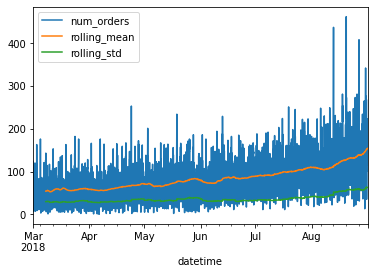

In [15]:
data[['num_orders', 'rolling_mean', 'rolling_std']].plot()

Сезонная составляющая за день:

In [16]:
decomposed = seasonal_decompose(data['num_orders'])

<AxesSubplot:xlabel='datetime'>

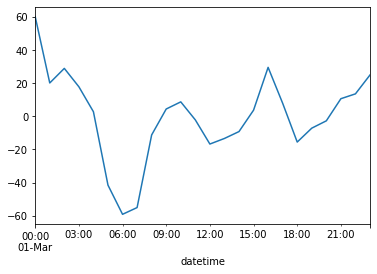

In [17]:
decomposed.seasonal['2018-03-01':'2018-03-01'].plot()

Создаем признаки с отстающими значениями:

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что сезонность рассмотренна на уменьшеноом временном интервале.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Если ресемлировать ряд по дню и вывести интервал около месяца, то можно увидеть сезонность внутри недели.</font>

In [18]:
def lags(data, max_lag):
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

<font color='blue'><b>Комментарий ревьюера: </b></font> \
<font color='green'>6) Признак rolling: ДА, это аналог тренда. Чем больше окно сглаживания, тем ровнее линия тренда.</font>

In [19]:
lags(data, 48)

Удаляем строки с пропущенными значениями и ненужные для обучения признаки

In [20]:
data.dropna(inplace=True)

In [21]:
data = data.drop(['rolling_std', 'month', 'day'], axis=1)

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

## Обучение

Создаем обучающую и тестовую выборки:

In [22]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)

In [23]:
train, valid = train_test_split(train, shuffle=False, test_size=0.2)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что запрещаешь перемешивание отчётов.</font>

In [25]:
train_features = train.drop(['num_orders'], axis=1)
train_target = train['num_orders']
valid_features = valid.drop(['num_orders'], axis=1)
valid_target = valid['num_orders']
test_features = test.drop(['num_orders'], axis=1)
test_target = test['num_orders']

Обучаем модель линейной регрессии и находим значение RMSE на обучающей выборке:

In [26]:
model_lr = LinearRegression()

In [27]:
model_lr.fit(train_features, train_target)

LinearRegression()

In [28]:
mean_squared_error(valid_target, model_lr.predict(valid_features), squared=False)

30.631196677274456

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Оценку модели следует проводить либо на валидационных данных, либо кроссвалидацией. predict(train) не покажет способность модели работать с новыми данными, на которых модель не обучалась.</s></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Отлично, что используешь валидационную выборку для оценки моделей.</font>

Также обучим модель RandomForestRegressor:

In [253]:
%%time
n_est = []
dep = []
results = []
for est in range(1, 102, 10):
    for depth in range(1, 51, 10):
        model = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=111)
        model.fit(train_features, train_target)
        predictions = model.predict(valid_features)
        result = mean_squared_error(valid_target, predictions, squared=False)
        dep.append(depth)
        n_est.append(est)
        results.append(result)
        print(est, '\r', end='')

CPU times: user 2min 57s, sys: 255 ms, total: 2min 58s
Wall time: 3min 1s


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Для подбора параметров, так же нужна либо кроссвалидация, либо отдельная валидационная выборка.</s></font>

In [254]:
res = pd.DataFrame(dep, n_est).reset_index()
res.columns = ['n_estimators', 'max_depth']
res['results'] = results
res

,n_estimators,max_depth,results
0,1,1,44.601265
1,1,11,39.800924
2,1,21,40.298229
3,1,31,42.256809
4,1,41,42.256809
5,11,1,46.858349
6,11,11,32.346471
7,11,21,32.378563
8,11,31,32.748548
9,11,41,32.748548


<AxesSubplot:xlabel='n_estimators'>

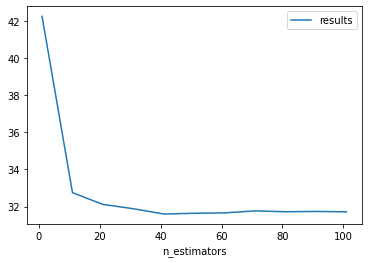

In [255]:
res[res['max_depth'] == 31].plot(kind='line', x='n_estimators', y='results')

In [388]:
model_rfr = RandomForestRegressor(n_estimators=40, max_depth=11, random_state=111)
model_rfr.fit(train_features, train_target)

RandomForestRegressor(max_depth=11, n_estimators=40, random_state=111)

## Тестирование

Проведем тестирование моделей:

In [389]:
pred_lr = model_lr.predict(test_features)
pred_rfr = model_rfr.predict(test_features)

In [390]:
lr = pd.DataFrame(test_target).reset_index().join(pd.DataFrame(pred_lr))
lr.set_index(lr['datetime'], inplace=True)
lr = lr.drop(['datetime'], axis=1)
lr.columns = ['target', 'predictions']

In [391]:
rfr = pd.DataFrame(test_target).reset_index().join(pd.DataFrame(pred_rfr))
rfr.set_index(rfr['datetime'], inplace=True)
rfr = rfr.drop(['datetime'], axis=1)
rfr.columns = ['target', 'predictions']

Графики целевых и предсказанных значений для всего тестового периода:

<AxesSubplot:xlabel='datetime'>

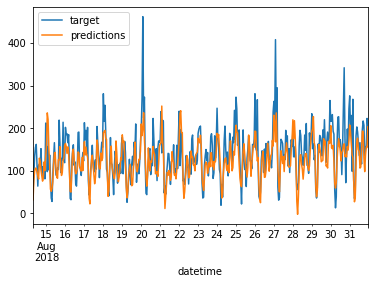

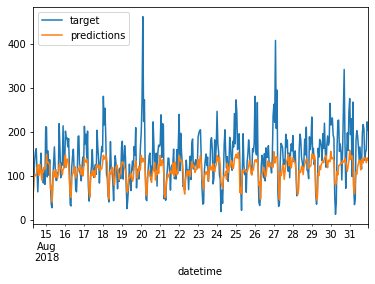

In [392]:
lr.plot()
rfr.plot()

Графики целевых и предсказанных значений для одного дня:

<AxesSubplot:xlabel='datetime'>

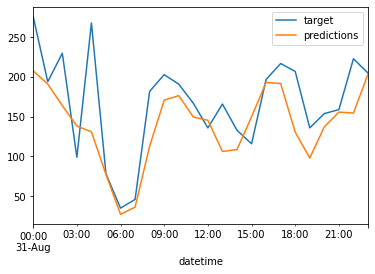

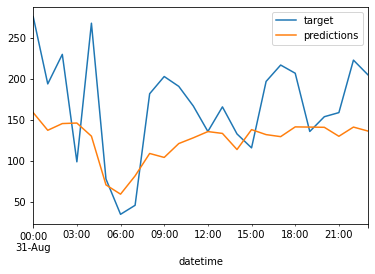

In [393]:
lr.loc['2018-08-31'].plot()
rfr.loc['2018-08-31'].plot()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что выводишь графики прогноза и реальных данных! Это один из важнейших инструментов анализа результатов моделирования временных рядов, чтобы увидеть где основные не "попадалки" модели.\
Лучше выбрать масштаб, скажем, несколько дней, чтобы увидеть можо было и сравнить каждый час.</font>

RMSE модели LinearRegression:

In [394]:
mean_squared_error(test_target, pred_lr, squared=False)

44.79000901456024

RMSE модели RandomForestRegressor:

In [395]:
mean_squared_error(test_target, pred_rfr, squared=False)

53.58373377586998

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

Были обучены и протестированы модели для предсказания количества заказов такси в час. RMSE лучшей модели составила 42,13.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Очень приятно видеть вывод в конце проекта! В выводах можно приводить полученные ранее значения. Также можно расписать все, что было сделано в ходе проведения работы.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'> Женя, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Не используй признак "месяц" на данных меньше года.</font></ul>
<ul><font color='red'>Если используешь предикт для сравнения моделей выдели для этого отдельную выборку, или оценивай кроссвалидацией.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'>  Женя, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='green'>Дополнительные материалы:\
Е.Рябенко - Прогнозирование временных рядов https://www.youtube.com/watch?v=u433nrxdf5k \
Б.Б. Демешев - временные ряды https://disk.yandex.ru/i/LiDHB-B3A6Lz5A \
Канторович - Анализ временных рядов https://yadi.sk/i/IOkUOS3hTXf3gg \

Базовое применение ARIMA - https://colab.research.google.com/drive/17RnG91Eq8JBKyxToNzvCvjibfxum-oPj?usp=sharing \
Prophet модель от известной компании https://facebook.github.io/prophet/ \
https://facebook.github.io/prophet/docs/quick_start.html#python-api \
https://nbviewer.jupyter.org/github/miptgirl/habra_materials/blob/master/prophet/habra_data.ipynb \
Или [Предсказываем будущее с помощью библиотеки Facebook Prophet](https://habr.com/ru/company/ods/blog/323730/)
</font> 

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48